<a href="https://colab.research.google.com/github/LonghuaHu/deep-learning/blob/master/comparison_of_10000mnist_data_0327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Quaternion CNN

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import h5py 
#data
f = h5py.File('/content/drive/My Drive/Colab Notebooks/new_quaternionImages.mat','r') 

X = f['quaternionImages'][:]
#data = data.T
print(X.shape)

#lable
f = h5py.File('/content/drive/My Drive/Colab Notebooks/new_quaternionImagesLabels.mat','r') 
y = f['quaternionImagesLabels'][:]
y = y.T
print(y.shape)



(10000, 12, 14, 14)
(10000, 1)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 12, 14, 14) (2000, 12, 14, 14) (8000, 1) (2000, 1)


In [6]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3],1)
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3],1)
#training_labels = training_labels[0]
y_train.astype(int)
y_test.astype(int)
print('Number of training examples: ' + str(X_train.shape[0]))
print('Training images shape:' + str(X_train.shape))
print('Training labels shape:' + str(y_train.shape))
print('Test images shape:' + str(X_test.shape))
print('Test labels shape:' + str(y_test.shape))

Number of training examples: 8000
Training images shape:(8000, 12, 14, 14, 1)
Training labels shape:(8000, 1)
Test images shape:(2000, 12, 14, 14, 1)
Test labels shape:(2000, 1)


In [7]:
import os
import tensorflow as tf
from keras.callbacks import TensorBoard

Using TensorFlow backend.


## 4 conv layers, 1pooling layer

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(12, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()




Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 12, 12, 12, 8)     80        
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 12, 10, 10, 16)    1168      
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 12, 8, 8, 32)      4640      
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 12, 6, 6, 32)      9248      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 11, 3, 3, 32)      0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 11, 3, 3, 32)      128       
_________________________________________________________________
flat

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_qcnn_4c1p = model.fit(X_train, y_train, epochs=20, verbose=1)
test_loss = model.evaluate(X_test, y_test)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
8000/8000 [==============================] - 5s 618us/sample - loss: 0.1496 - acc: 0.9514
Epoch 2/20
8000/8000 [==============================] - 4s 461us/sample - loss: 0.0587 - acc: 0.9830
Epoch 3/20
8000/8000 [==============================] - 4s 454us/sample - loss: 0.0352 - acc: 0.9893
Epoch 4/20
8000/8000 [==============================] - 4s 454us/sample - loss: 0.0245 - acc: 0.9924
Epoch 5/20
8000/8000 [==============================] - 4s 448us/sample - loss: 0.0154 - acc: 0.9956
Epoch 6/20
8000/8000 [==============================] - 4s 454us/sample - loss: 0.0106 - acc: 0.9964
Epoch 7/20
8000/8000 [==============================] - 4s 458us/sample - loss: 0.0086 - acc: 0.9979
Epoch 8/20
8000/8000 [==============================] - 4s 461us/sample - loss: 0.0082 - acc: 0.9974
Epoch 9/20
8000/8000 [==============================] - 4s 454us/sample - loss: 0.0070 - acc: 0.9983
Epoch 10/20
8000/8000 [====================

## 2 conv layers, 1 pooling layer

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(12, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_4 (Conv3D)            (None, 12, 12, 12, 8)     80        
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 12, 10, 10, 16)    1168      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 11, 5, 5, 16)      0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 11, 5, 5, 16)      64        
_________________________________________________________________
flatten_1 (Flatten)          (None, 4400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               563328    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total para

In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_qcnn_2c1p = model.fit(X_train, y_train, epochs=20, verbose=1)
test_loss = model.evaluate(X_test, y_test)


#model.fit(X_train, y_train, epochs=30)
#test_loss = model.evaluate(X_test, y_test)

#model.fit(X_train, y_train, epochs=10,
#          validation_data=(X_test, y_test),
#          callbacks=[TrainValTensorBoard(write_graph=False)])

Epoch 1/20
8000/8000 [==============================] - 3s 388us/sample - loss: 0.1799 - acc: 0.9504
Epoch 2/20
8000/8000 [==============================] - 3s 367us/sample - loss: 0.0941 - acc: 0.9750
Epoch 3/20
8000/8000 [==============================] - 3s 364us/sample - loss: 0.0527 - acc: 0.9846
Epoch 4/20
8000/8000 [==============================] - 3s 358us/sample - loss: 0.0301 - acc: 0.9918
Epoch 5/20
8000/8000 [==============================] - 3s 368us/sample - loss: 0.0205 - acc: 0.9934
Epoch 6/20
8000/8000 [==============================] - 3s 364us/sample - loss: 0.0142 - acc: 0.9955
Epoch 7/20
8000/8000 [==============================] - 3s 372us/sample - loss: 0.0089 - acc: 0.9974
Epoch 8/20
8000/8000 [==============================] - 3s 373us/sample - loss: 0.0071 - acc: 0.9976
Epoch 9/20
8000/8000 [==============================] - 3s 374us/sample - loss: 0.0074 - acc: 0.9973
Epoch 10/20
8000/8000 [==============================] - 3s 380us/sample - loss: 0.0036 - a

## 3 conv layers, 1 pooling layer

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(12, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_6 (Conv3D)            (None, 12, 12, 12, 8)     80        
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 12, 10, 10, 16)    1168      
_________________________________________________________________
conv3d_8 (Conv3D)            (None, 12, 8, 8, 32)      4640      
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 11, 4, 4, 32)      0         
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 11, 4, 4, 32)      128       
_________________________________________________________________
flatten_2 (Flatten)          (None, 5632)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               721024    
__________

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_qcnn_3c1p = model.fit(X_train, y_train, epochs=20, verbose=1)
test_loss = model.evaluate(X_test, y_test)


#model.fit(X_train, y_train, epochs=30)
#test_loss = model.evaluate(X_test, y_test)

#model.fit(X_train, y_train, epochs=10,
#          validation_data=(X_test, y_test),
#          callbacks=[TrainValTensorBoard(write_graph=False)])

Epoch 1/20
8000/8000 [==============================] - 4s 467us/sample - loss: 0.1788 - acc: 0.9561
Epoch 2/20
8000/8000 [==============================] - 3s 424us/sample - loss: 0.0759 - acc: 0.9829
Epoch 3/20
8000/8000 [==============================] - 3s 428us/sample - loss: 0.0412 - acc: 0.9894
Epoch 4/20
8000/8000 [==============================] - 3s 416us/sample - loss: 0.0254 - acc: 0.9934
Epoch 5/20
8000/8000 [==============================] - 3s 418us/sample - loss: 0.0158 - acc: 0.9960
Epoch 6/20
8000/8000 [==============================] - 3s 427us/sample - loss: 0.0142 - acc: 0.9964
Epoch 7/20
8000/8000 [==============================] - 3s 417us/sample - loss: 0.0089 - acc: 0.9981
Epoch 8/20
8000/8000 [==============================] - 3s 413us/sample - loss: 0.0063 - acc: 0.9984
Epoch 9/20
8000/8000 [==============================] - 3s 411us/sample - loss: 0.0070 - acc: 0.9984
Epoch 10/20
8000/8000 [==============================] - 3s 410us/sample - loss: 0.0061 - a

## 1 conv layer, 1 pooling layer

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (3,3,3), activation='relu', input_shape=(12, 14, 14, 1)))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_9 (Conv3D)            (None, 10, 12, 12, 8)     224       
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 9, 6, 6, 8)        0         
_________________________________________________________________
batch_normalization_v1_3 (Ba (None, 9, 6, 6, 8)        32        
_________________________________________________________________
flatten_3 (Flatten)          (None, 2592)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               331904    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 332,289
Trainable params: 332,273
Non-trainable params: 16
_________________________________________________________________


In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_qcnn_1c1p = model.fit(X_train, y_train, epochs=20, verbose=1)
test_loss = model.evaluate(X_test, y_test)



Epoch 1/20
8000/8000 [==============================] - 3s 360us/sample - loss: 0.2429 - acc: 0.9219
Epoch 2/20
8000/8000 [==============================] - 3s 314us/sample - loss: 0.1146 - acc: 0.9636
Epoch 3/20
8000/8000 [==============================] - 3s 319us/sample - loss: 0.0824 - acc: 0.9736
Epoch 4/20
8000/8000 [==============================] - 3s 314us/sample - loss: 0.0652 - acc: 0.9786
Epoch 5/20
8000/8000 [==============================] - 2s 301us/sample - loss: 0.0525 - acc: 0.9805
Epoch 6/20
8000/8000 [==============================] - 2s 307us/sample - loss: 0.0410 - acc: 0.9854
Epoch 7/20
8000/8000 [==============================] - 2s 309us/sample - loss: 0.0350 - acc: 0.9880
Epoch 8/20
8000/8000 [==============================] - 2s 304us/sample - loss: 0.0309 - acc: 0.9893
Epoch 9/20
8000/8000 [==============================] - 2s 303us/sample - loss: 0.0250 - acc: 0.9910
Epoch 10/20
8000/8000 [==============================] - 2s 303us/sample - loss: 0.0238 - a

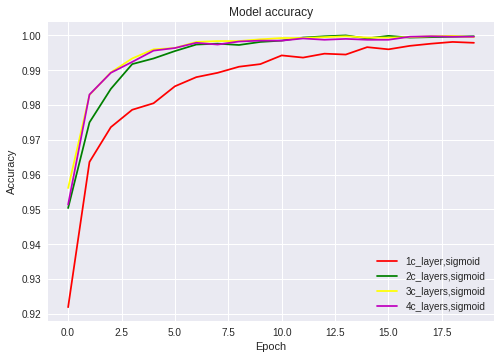

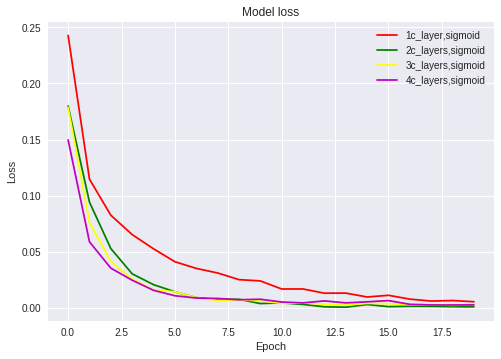

In [16]:
# Plot training accuracy values
plt.plot(history_qcnn_1c1p.history['acc'], color='red', label='1c_layer,sigmoid')
plt.plot(history_qcnn_2c1p.history['acc'], color='green', label='2c_layers,sigmoid')
plt.plot(history_qcnn_3c1p.history['acc'], color='yellow', label='3c_layers,sigmoid')
plt.plot(history_qcnn_4c1p.history['acc'], color='m', label='4c_layers,sigmoid')
#plt.plot(history3.history['acc'], color='blue', label='1c_layer,tanh')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_qcnn_1c1p.history['loss'], color='red', label='1c_layer,sigmoid')
plt.plot(history_qcnn_2c1p.history['loss'], color='green', label='2c_layers,sigmoid')
plt.plot(history_qcnn_3c1p.history['loss'], color='yellow', label='3c_layers,sigmoid')
plt.plot(history_qcnn_4c1p.history['loss'], color='m', label='4c_layers,sigmoid')
#plt.plot(history3.history['loss'], color='blue', label='1c_layer,tanh')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()



## 3 conv layer, 1 pooling layer,elu function

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (3,3,3), activation='elu', input_shape=(12, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (3,3,3), activation='elu'))
model.add(tf.keras.layers.Conv3D(32, (3,3,3), activation='elu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_10 (Conv3D)           (None, 10, 12, 12, 8)     224       
_________________________________________________________________
conv3d_11 (Conv3D)           (None, 8, 10, 10, 16)     3472      
_________________________________________________________________
conv3d_12 (Conv3D)           (None, 6, 8, 8, 32)       13856     
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 5, 4, 4, 32)       0         
_________________________________________________________________
batch_normalization_v1_4 (Ba (None, 5, 4, 4, 32)       128       
_________________________________________________________________
flatten_4 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               327808    
__________

In [0]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_qcnn_3c1p_elu = model.fit(X_train, y_train, epochs=20, verbose=1)
test_loss = model.evaluate(X_test, y_test)


#model.fit(X_train, y_train, epochs=30)
#test_loss = model.evaluate(X_test, y_test)

#model.fit(X_train, y_train, epochs=10,
#          validation_data=(X_test, y_test),
#          callbacks=[TrainValTensorBoard(write_graph=False)])

Epoch 1/20
8000/8000 [==============================] - 3s 430us/sample - loss: 0.1789 - acc: 0.9339
Epoch 2/20
8000/8000 [==============================] - 3s 366us/sample - loss: 0.0490 - acc: 0.9819
Epoch 3/20
8000/8000 [==============================] - 3s 368us/sample - loss: 0.0260 - acc: 0.9921
Epoch 4/20
8000/8000 [==============================] - 3s 368us/sample - loss: 0.0125 - acc: 0.9960
Epoch 5/20
8000/8000 [==============================] - 3s 369us/sample - loss: 0.0089 - acc: 0.9979
Epoch 6/20
8000/8000 [==============================] - 3s 368us/sample - loss: 0.0071 - acc: 0.9984
Epoch 7/20
8000/8000 [==============================] - 3s 367us/sample - loss: 0.0055 - acc: 0.9985
Epoch 8/20
8000/8000 [==============================] - 3s 368us/sample - loss: 0.0071 - acc: 0.9985
Epoch 9/20
8000/8000 [==============================] - 3s 370us/sample - loss: 0.0052 - acc: 0.9990
Epoch 10/20
8000/8000 [==============================] - 3s 370us/sample - loss: 0.0027 - a

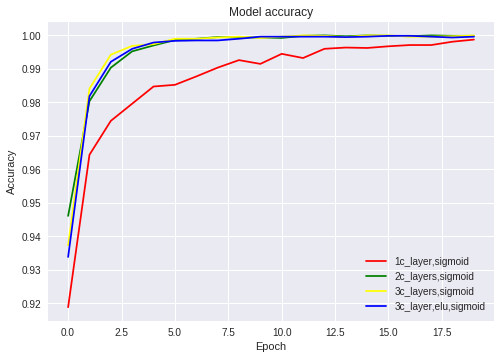

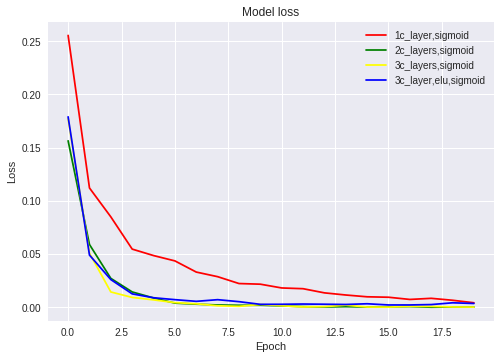

In [0]:
# Plot training accuracy values
plt.plot(history_qcnn_1c1p.history['acc'], color='red', label='1c_layer,sigmoid')
plt.plot(history_qcnn_2c1p.history['acc'], color='green', label='2c_layers,sigmoid')
plt.plot(history_qcnn_3c1p.history['acc'], color='yellow', label='3c_layers,sigmoid')
plt.plot(history_qcnn_3c1p_elu.history['acc'], color='blue', label='3c_layer,elu,sigmoid')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_qcnn_1c1p.history['loss'], color='red', label='1c_layer,sigmoid')
plt.plot(history_qcnn_2c1p.history['loss'], color='green', label='2c_layers,sigmoid')
plt.plot(history_qcnn_3c1p.history['loss'], color='yellow', label='3c_layers,sigmoid')
plt.plot(history_qcnn_3c1p_elu.history['loss'], color='blue', label='3c_layer,elu,sigmoid')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()





In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (3,3,3), activation='relu', input_shape=(12, 14, 14, 1)))
model.add(tf.keras.layers.Conv3D(16, (3,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (3,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(64, (3,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(128, (3,3,3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())

#model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_15 (Conv3D)           (None, 10, 12, 12, 8)     224       
_________________________________________________________________
conv3d_16 (Conv3D)           (None, 8, 10, 10, 16)     3472      
_________________________________________________________________
conv3d_17 (Conv3D)           (None, 6, 8, 8, 32)       13856     
_________________________________________________________________
conv3d_18 (Conv3D)           (None, 4, 6, 6, 64)       55360     
_________________________________________________________________
conv3d_19 (Conv3D)           (None, 2, 4, 4, 128)      221312    
_________________________________________________________________
batch_normalization_v1_6 (Ba (None, 2, 4, 4, 128)      512       
_________________________________________________________________
flatten_6 (Flatten)          (None, 4096)              0         
__________

In [0]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_qcnn_4c0p = model.fit(X_train, y_train, epochs=20, verbose=1)
test_loss = model.evaluate(X_test, y_test)


#model.fit(X_train, y_train, epochs=30)
#test_loss = model.evaluate(X_test, y_test)

#model.fit(X_train, y_train, epochs=10,
#          validation_data=(X_test, y_test),
#          callbacks=[TrainValTensorBoard(write_graph=False)])

Epoch 1/20
8000/8000 [==============================] - 5s 605us/sample - loss: 0.2604 - acc: 0.9169
Epoch 2/20
8000/8000 [==============================] - 4s 524us/sample - loss: 0.1089 - acc: 0.9664
Epoch 3/20
8000/8000 [==============================] - 4s 516us/sample - loss: 0.0590 - acc: 0.9815
Epoch 4/20
8000/8000 [==============================] - 4s 520us/sample - loss: 0.0393 - acc: 0.9889
Epoch 5/20
8000/8000 [==============================] - 4s 527us/sample - loss: 0.0317 - acc: 0.9902
Epoch 6/20
8000/8000 [==============================] - 4s 529us/sample - loss: 0.0209 - acc: 0.9934
Epoch 7/20
8000/8000 [==============================] - 4s 534us/sample - loss: 0.0195 - acc: 0.9944
Epoch 8/20
8000/8000 [==============================] - 4s 524us/sample - loss: 0.0113 - acc: 0.9967
Epoch 9/20
8000/8000 [==============================] - 4s 520us/sample - loss: 0.0102 - acc: 0.9962
Epoch 10/20
8000/8000 [==============================] - 4s 522us/sample - loss: 0.0028 - a

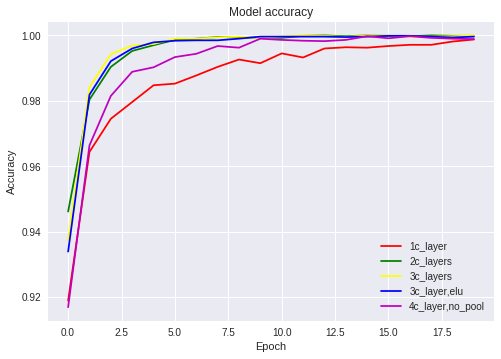

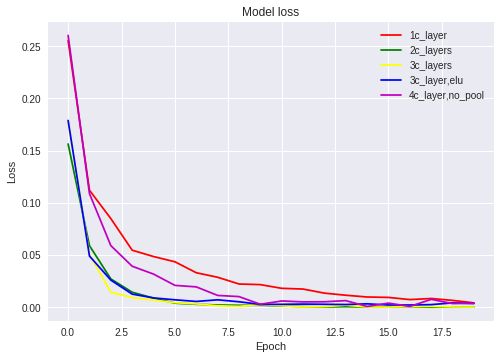

In [0]:
# Plot training accuracy values
plt.plot(history_qcnn_1c1p.history['acc'], color='red', label='1c_layer')
plt.plot(history_qcnn_2c1p.history['acc'], color='green', label='2c_layers')
plt.plot(history_qcnn_3c1p.history['acc'], color='yellow', label='3c_layers')
plt.plot(history_qcnn_3c1p_elu.history['acc'], color='blue', label='3c_layer,elu')
plt.plot(history_qcnn_4c0p.history['acc'], color='m', label='4c_layer,no_pool')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_qcnn_1c1p.history['loss'], color='red', label='1c_layer')
plt.plot(history_qcnn_2c1p.history['loss'], color='green', label='2c_layers')
plt.plot(history_qcnn_3c1p.history['loss'], color='yellow', label='3c_layers')
plt.plot(history_qcnn_3c1p_elu.history['loss'], color='blue', label='3c_layer,elu')
plt.plot(history_qcnn_4c0p.history['loss'], color='m', label='4c_layer,no_pool')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()





# With Wavelet CNN

In [18]:
f = h5py.File('/content/drive/My Drive/Colab Notebooks/waveletImages.mat','r') 

X_w = f['waveletImages'][:]
print(X_w.shape)

#lable
f = h5py.File('/content/drive/My Drive/Colab Notebooks/waveletImagesLabels.mat','r') 
y_w = f['waveletImagesLabels'][:]
y_w = y_w.T
print(y_w.shape)

(10000, 4, 14, 14)
(10000, 1)


In [0]:
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
X_w, y_w, test_size=0.2, random_state=42)

In [20]:
X_train_w = X_train_w.reshape(X_train_w.shape[0], X_train_w.shape[1], X_train_w.shape[2], X_train_w.shape[3],1)
X_test_w = X_test_w.reshape(X_test_w.shape[0], X_train_w.shape[1], X_train_w.shape[2], X_train_w.shape[3],1)
#training_labels = training_labels[0]
y_train_w.astype(int)
y_test_w.astype(int)
print('Number of training examples: ' + str(X_train_w.shape[0]))
print('Training images shape:' + str(X_train_w.shape))
print('Training labels shape:' + str(y_train_w.shape))
print('Test images shape:' + str(X_test_w.shape))
print('Test labels shape:' + str(y_test_w.shape))

Number of training examples: 8000
Training images shape:(8000, 4, 14, 14, 1)
Training labels shape:(8000, 1)
Test images shape:(2000, 4, 14, 14, 1)
Test labels shape:(2000, 1)


## 2 conv layers, 1 pooling layer

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(4, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_13 (Conv3D)           (None, 4, 12, 12, 8)      80        
_________________________________________________________________
conv3d_14 (Conv3D)           (None, 4, 10, 10, 16)     1168      
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 3, 5, 5, 16)       0         
_________________________________________________________________
batch_normalization_v1_5 (Ba (None, 3, 5, 5, 16)       64        
_________________________________________________________________
flatten_5 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               153728    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total para

In [22]:

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_wcnn_2c1p = model.fit(X_train_w, y_train_w, epochs=20, verbose=1)
test_loss = model.evaluate(X_test_w, y_test_w)

Epoch 1/20
8000/8000 [==============================] - 5s 685us/sample - loss: 0.1051 - acc: 0.9595
Epoch 2/20
8000/8000 [==============================] - 5s 594us/sample - loss: 0.0484 - acc: 0.9844
Epoch 3/20
8000/8000 [==============================] - 5s 631us/sample - loss: 0.0332 - acc: 0.9895
Epoch 4/20
8000/8000 [==============================] - 5s 576us/sample - loss: 0.0257 - acc: 0.9920
Epoch 5/20
8000/8000 [==============================] - 5s 569us/sample - loss: 0.0184 - acc: 0.9945
Epoch 6/20
8000/8000 [==============================] - 5s 608us/sample - loss: 0.0139 - acc: 0.9951
Epoch 7/20
8000/8000 [==============================] - 5s 590us/sample - loss: 0.0097 - acc: 0.9969
Epoch 8/20
8000/8000 [==============================] - 4s 559us/sample - loss: 0.0060 - acc: 0.9977
Epoch 9/20
8000/8000 [==============================] - 5s 569us/sample - loss: 0.0045 - acc: 0.9986
Epoch 10/20
8000/8000 [==============================] - 5s 571us/sample - loss: 0.0042 - a

## 4 conv layers, 1 pooling layer

In [23]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(4, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_15 (Conv3D)           (None, 4, 12, 12, 8)      80        
_________________________________________________________________
conv3d_16 (Conv3D)           (None, 4, 10, 10, 16)     1168      
_________________________________________________________________
conv3d_17 (Conv3D)           (None, 4, 8, 8, 32)       4640      
_________________________________________________________________
conv3d_18 (Conv3D)           (None, 4, 6, 6, 32)       9248      
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 3, 3, 3, 32)       0         
_________________________________________________________________
batch_normalization_v1_6 (Ba (None, 3, 3, 3, 32)       128       
_________________________________________________________________
flatten_6 (Flatten)          (None, 864)               0         
__________

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_wcnn_4c1p = model.fit(X_train_w, y_train_w, epochs=20, verbose=1)
test_loss = model.evaluate(X_test_w, y_test_w)

Epoch 1/20
8000/8000 [==============================] - 7s 857us/sample - loss: 0.1033 - acc: 0.9624
Epoch 2/20
8000/8000 [==============================] - 6s 689us/sample - loss: 0.0331 - acc: 0.9880
Epoch 3/20
8000/8000 [==============================] - 6s 705us/sample - loss: 0.0167 - acc: 0.9939
Epoch 4/20
8000/8000 [==============================] - 5s 685us/sample - loss: 0.0083 - acc: 0.9973
Epoch 5/20
8000/8000 [==============================] - 5s 644us/sample - loss: 0.0030 - acc: 0.9991
Epoch 6/20
8000/8000 [==============================] - 4s 504us/sample - loss: 0.0025 - acc: 0.9991
Epoch 7/20
8000/8000 [==============================] - 3s 397us/sample - loss: 0.0018 - acc: 0.9992
Epoch 8/20
8000/8000 [==============================] - 3s 388us/sample - loss: 8.7442e-04 - acc: 0.9996
Epoch 9/20
8000/8000 [==============================] - 3s 399us/sample - loss: 5.2523e-04 - acc: 0.9999
Epoch 10/20
8000/8000 [==============================] - 3s 377us/sample - loss: 3.

## 3 conv layers, 1 pooling layer

In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(4, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_19 (Conv3D)           (None, 4, 12, 12, 8)      80        
_________________________________________________________________
conv3d_20 (Conv3D)           (None, 4, 10, 10, 16)     1168      
_________________________________________________________________
conv3d_21 (Conv3D)           (None, 4, 8, 8, 32)       4640      
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 3, 4, 4, 32)       0         
_________________________________________________________________
batch_normalization_v1_7 (Ba (None, 3, 4, 4, 32)       128       
_________________________________________________________________
flatten_7 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               196736    
__________

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_wcnn_3c1p = model.fit(X_train_w, y_train_w, epochs=20, verbose=1)
test_loss = model.evaluate(X_test_w, y_test_w)

Epoch 1/20
8000/8000 [==============================] - 3s 377us/sample - loss: 0.0967 - acc: 0.9643
Epoch 2/20
8000/8000 [==============================] - 3s 342us/sample - loss: 0.0376 - acc: 0.9884
Epoch 3/20
8000/8000 [==============================] - 3s 350us/sample - loss: 0.0223 - acc: 0.9931
Epoch 4/20
8000/8000 [==============================] - 3s 344us/sample - loss: 0.0156 - acc: 0.9942
Epoch 5/20
8000/8000 [==============================] - 3s 345us/sample - loss: 0.0073 - acc: 0.9976
Epoch 6/20
8000/8000 [==============================] - 3s 362us/sample - loss: 0.0042 - acc: 0.9987
Epoch 7/20
8000/8000 [==============================] - 3s 349us/sample - loss: 0.0039 - acc: 0.9984
Epoch 8/20
8000/8000 [==============================] - 3s 347us/sample - loss: 0.0016 - acc: 0.9994
Epoch 9/20
8000/8000 [==============================] - 3s 340us/sample - loss: 0.0018 - acc: 0.9994
Epoch 10/20
8000/8000 [==============================] - 3s 345us/sample - loss: 9.3253e-04

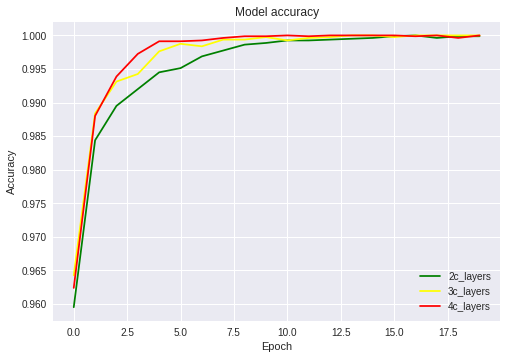

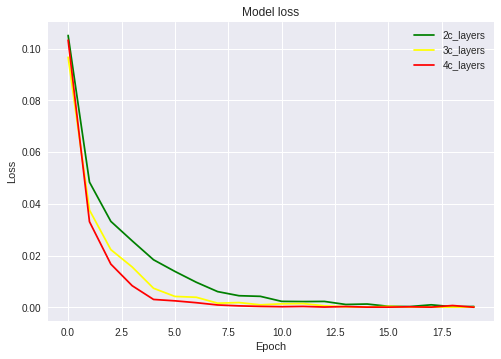

In [27]:
# Plot training accuracy values
plt.plot(history_wcnn_2c1p.history['acc'], color='green', label='2c_layers')
plt.plot(history_wcnn_3c1p.history['acc'], color='yellow', label='3c_layers')
plt.plot(history_wcnn_4c1p.history['acc'], color='red', label='4c_layers')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_wcnn_2c1p.history['loss'], color='green', label='2c_layers')
plt.plot(history_wcnn_3c1p.history['loss'], color='yellow', label='3c_layers')
plt.plot(history_wcnn_4c1p.history['loss'], color='red', label='4c_layers')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()





# With original CNN

In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

folder = "/content/drive/My Drive/Colab Notebooks/mnistdata"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(42, 45):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=28, height=28))

# Any results you write to the current directory are saved as output.

Working with 10000 images
Image examples: 
0_2655.png


1_6341.png


1_9072.png


In [29]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    y_train.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 28
image_height = 28
channels = 3

nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                     dtype=np.float32)

print(dataset.shape)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape(3,28,28)
    # Normalize
    x = x / 255.0
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

Files in train_files: 10000
(10000, 3, 28, 28)
250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
5250 images to array
5500 images to array
5750 images to array
6000 images to array
6250 images to array
6500 images to array
6750 images to array
7000 images to array
7250 images to array
7500 images to array
7750 images to array
8000 images to array
8250 images to array
8500 images to array
8750 images to array
9000 images to array
9250 images to array
9500 images to array
9750 images to array
10000 images to array
All images to array!


In [0]:
import scipy.io
scipy.io.savemat("mnist_data.mat", mdict={'mnist_10000': X})

In [30]:
X = dataset.reshape(len(train_files), image_height, image_width,channels)
print(X.shape)

(10000, 28, 28, 3)


In [0]:
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
X, y_train, test_size=0.2, random_state=42)

In [32]:
print(X_train_cnn.shape)
print(X_test_cnn.shape)
print(len(y_train_cnn))
print(len(y_test_cnn))

(8000, 28, 28, 3)
(2000, 28, 28, 3)
8000
2000


## 3 conv layers, 1pool

In [33]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
#model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_v1_8 (Ba (None, 11, 11, 32)        128       
_________________________________________________________________
flatten_8 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               495744    
__________

In [34]:


model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_cnn = model.fit(X_train_cnn, y_train_cnn, epochs=20, verbose=1)
test_loss = model.evaluate(X_test_cnn, y_test_cnn)

Epoch 1/20
8000/8000 [==============================] - 3s 349us/sample - loss: 0.1505 - acc: 0.9565
Epoch 2/20
8000/8000 [==============================] - 3s 350us/sample - loss: 0.0467 - acc: 0.9846
Epoch 3/20
8000/8000 [==============================] - 3s 364us/sample - loss: 0.0323 - acc: 0.9910
Epoch 4/20
8000/8000 [==============================] - 3s 356us/sample - loss: 0.0207 - acc: 0.9939
Epoch 5/20
8000/8000 [==============================] - 3s 350us/sample - loss: 0.0165 - acc: 0.9951
Epoch 6/20
8000/8000 [==============================] - 3s 347us/sample - loss: 0.0091 - acc: 0.9971
Epoch 7/20
8000/8000 [==============================] - 3s 357us/sample - loss: 0.0126 - acc: 0.9971
Epoch 8/20
8000/8000 [==============================] - 3s 334us/sample - loss: 0.0110 - acc: 0.9967
Epoch 9/20
8000/8000 [==============================] - 2s 301us/sample - loss: 0.0060 - acc: 0.9987
Epoch 10/20
8000/8000 [==============================] - 2s 306us/sample - loss: 0.0080 - a

## 2 conv layers, 1 pool

In [36]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
#model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 8)         224       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
batch_normalization_v1_9 (Ba (None, 12, 12, 16)        64        
_________________________________________________________________
flatten_9 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 129       
Total para

In [37]:


model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_cnn_2 = model.fit(X_train_cnn, y_train_cnn, epochs=20, verbose=1)
test_loss = model.evaluate(X_test_cnn, y_test_cnn)

Epoch 1/20
8000/8000 [==============================] - 2s 288us/sample - loss: 0.1421 - acc: 0.9514
Epoch 2/20
8000/8000 [==============================] - 2s 241us/sample - loss: 0.0567 - acc: 0.9812
Epoch 3/20
8000/8000 [==============================] - 2s 242us/sample - loss: 0.0371 - acc: 0.9881
Epoch 4/20
8000/8000 [==============================] - 2s 239us/sample - loss: 0.0321 - acc: 0.9899
Epoch 5/20
8000/8000 [==============================] - 2s 242us/sample - loss: 0.0244 - acc: 0.9909
Epoch 6/20
8000/8000 [==============================] - 2s 236us/sample - loss: 0.0160 - acc: 0.9950
Epoch 7/20
8000/8000 [==============================] - 2s 237us/sample - loss: 0.0133 - acc: 0.9948
Epoch 8/20
8000/8000 [==============================] - 2s 238us/sample - loss: 0.0106 - acc: 0.9962
Epoch 9/20
8000/8000 [==============================] - 2s 237us/sample - loss: 0.0068 - acc: 0.9969
Epoch 10/20
8000/8000 [==============================] - 2s 248us/sample - loss: 0.0111 - a

## 4 conv layers, 1 pool

In [38]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 8)         224       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
batch_normalization_v1_10 (B (None, 10, 10, 32)        128       
_________________________________________________________________
flatten_10 (Flatten)         (None, 3200)              0         
__________

In [39]:


model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history_cnn_3 = model.fit(X_train_cnn, y_train_cnn, epochs=20, verbose=1)
test_loss = model.evaluate(X_test_cnn, y_test_cnn)

Epoch 1/20
8000/8000 [==============================] - 3s 399us/sample - loss: 0.1046 - acc: 0.9634
Epoch 2/20
8000/8000 [==============================] - 3s 342us/sample - loss: 0.0382 - acc: 0.9871
Epoch 3/20
8000/8000 [==============================] - 3s 348us/sample - loss: 0.0254 - acc: 0.9921
Epoch 4/20
8000/8000 [==============================] - 3s 343us/sample - loss: 0.0174 - acc: 0.9950
Epoch 5/20
8000/8000 [==============================] - 3s 341us/sample - loss: 0.0151 - acc: 0.9955
Epoch 6/20
8000/8000 [==============================] - 3s 332us/sample - loss: 0.0126 - acc: 0.9954
Epoch 7/20
8000/8000 [==============================] - 3s 345us/sample - loss: 0.0084 - acc: 0.9970
Epoch 8/20
8000/8000 [==============================] - 3s 344us/sample - loss: 0.0047 - acc: 0.9981
Epoch 9/20
8000/8000 [==============================] - 3s 354us/sample - loss: 0.0051 - acc: 0.9985
Epoch 10/20
8000/8000 [==============================] - 3s 360us/sample - loss: 0.0037 - a

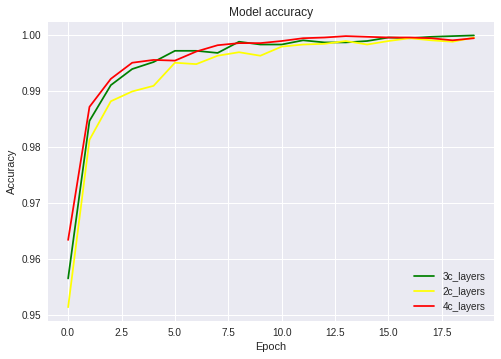

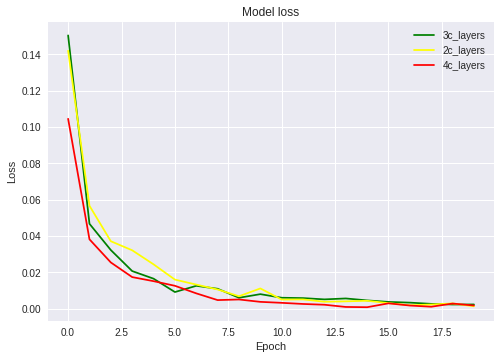

In [41]:
# Plot training accuracy values
plt.plot(history_cnn.history['acc'], color='green', label='3c_layers')
plt.plot(history_cnn_2.history['acc'], color='yellow', label='2c_layers')
plt.plot(history_cnn_3.history['acc'], color='red', label='4c_layers')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_cnn.history['loss'], color='green', label='3c_layers')
plt.plot(history_cnn_2.history['loss'], color='yellow', label='2c_layers')
plt.plot(history_cnn_3.history['loss'], color='red', label='4c_layers')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()





# Comparison

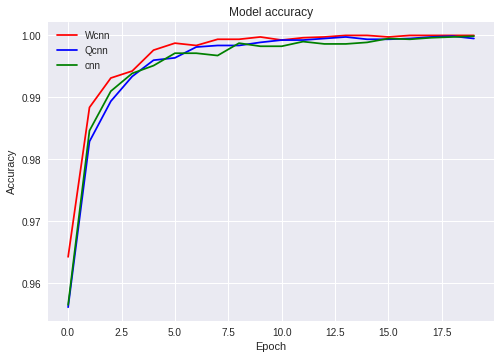

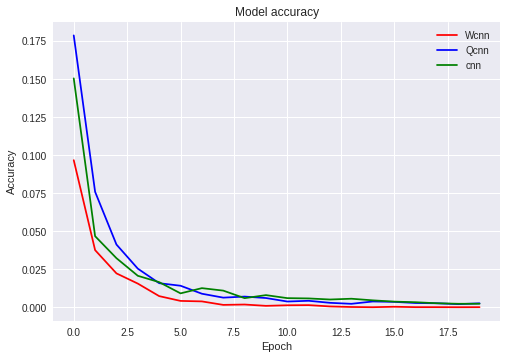

In [42]:
# Plot training accuracy values
plt.plot(history_wcnn_3c1p.history['acc'], color='red', label='Wcnn')
plt.plot(history_qcnn_3c1p.history['acc'], color='blue', label='Qcnn')
plt.plot(history_cnn.history['acc'], color='green', label='cnn')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_wcnn_3c1p.history['loss'], color='red', label='Wcnn')
plt.plot(history_qcnn_3c1p.history['loss'], color='blue', label='Qcnn')
plt.plot(history_cnn.history['loss'], color='green', label='cnn')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()







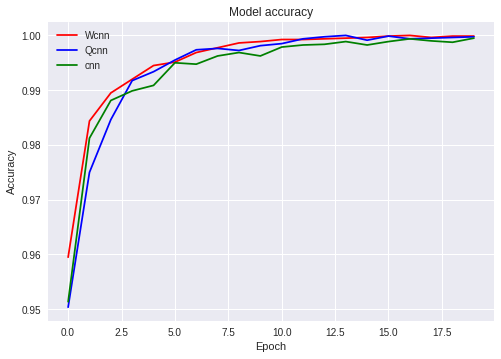

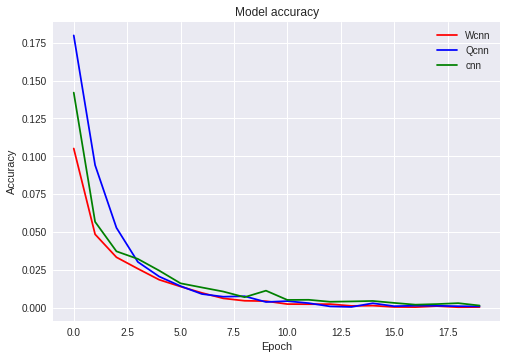

In [43]:
# Plot training accuracy values
plt.plot(history_wcnn_2c1p.history['acc'], color='red', label='Wcnn')
plt.plot(history_qcnn_2c1p.history['acc'], color='blue', label='Qcnn')
plt.plot(history_cnn_2.history['acc'], color='green', label='cnn')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_wcnn_2c1p.history['loss'], color='red', label='Wcnn')
plt.plot(history_qcnn_2c1p.history['loss'], color='blue', label='Qcnn')
plt.plot(history_cnn_2.history['loss'], color='green', label='cnn')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()





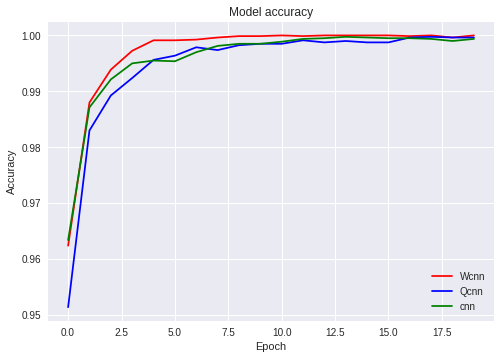

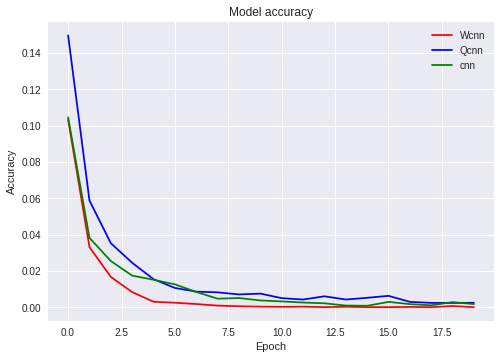

In [44]:
# Plot training accuracy values
plt.plot(history_wcnn_4c1p.history['acc'], color='red', label='Wcnn')
plt.plot(history_qcnn_4c1p.history['acc'], color='blue', label='Qcnn')
plt.plot(history_cnn_3.history['acc'], color='green', label='cnn')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_wcnn_4c1p.history['loss'], color='red', label='Wcnn')
plt.plot(history_qcnn_4c1p.history['loss'], color='blue', label='Qcnn')
plt.plot(history_cnn_3.history['loss'], color='green', label='cnn')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


